# Introduction to Jupyter Notebook

## 1. Python fundmentals

In [1]:
print("Hello IS6400")

Hello IS6400


In [2]:
a = 1+2
b = 2**3 # 2^3
c = a + b
print(c)

11


#### NumPy is a library used for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

In [3]:
import numpy as np
# e^2
d = np.exp(2)
print(d)

7.38905609893065


#### OS library provides a portable way of using operating system dependent functionality.

In [4]:
# check the current working directory
import os
os.getcwd()

'C:\\Users\\user\\OneDrive - City University of Hong Kong\\IS6400'

In [5]:
# if you would like to change your directory, use os.chdir()
os.chdir("path to the directory")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'path to the directory'

#### Pandas is a library used for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series.

In [1]:
# import data using pandas package
import pandas as pd
crash = pd.read_csv("austin_crash.csv")

## 2. Simple data manipulations

In [2]:
# print dimension of our data
print(crash.shape)

(32859, 15)


In [3]:
# print out first 5 rows of the data
print(crash.head())

   Crash_ID    Make  Model_Year  Body_Style  Age  Gender  Total_Injury  Death  \
0  15305026    Ford      2015.0      Pickup   43    Male             0      0   
1  15305026    Ford      2015.0      Pickup   30    Male             0      0   
2  15636003  Nissan      2015.0  Car 4 door   27    Male             1      0   
3  15636003  Nissan      2015.0  Car 4 door   21  Female             1      0   
4  15636003  Nissan      2015.0  Car 4 door   69  Female             1      0   

  Crash_Date  Crash_Year  Crash_Month  Crash_Week_Day Crash_Time   Latitude  \
0     9/3/16        2016            9               6   12:00 AM  30.167140   
1     9/3/16        2016            9               6   12:00 AM  30.167140   
2     3/8/17        2017            3               3    3:00 PM  30.426613   
3     3/8/17        2017            3               3    3:00 PM  30.426613   
4     3/8/17        2017            3               3    3:00 PM  30.426613   

   Longitude  
0  -97.79110  
1  -97.7

In [8]:
# check the column of Make
print(crash['Make'])

0          Ford
1          Ford
2        Nissan
3        Nissan
4        Nissan
          ...  
32854    Toyota
32855     Honda
32856     Honda
32857      Ford
32858      Ford
Name: Make, Length: 32859, dtype: object


In [9]:
# check the columns of Age and Gender
print(crash[['Age','Gender']])

       Age  Gender
0       43    Male
1       30    Male
2       27    Male
3       21  Female
4       69  Female
...    ...     ...
32854   28    Male
32855   32    Male
32856   42    Male
32857   29    Male
32858   27  Female

[32859 rows x 2 columns]


## 3. Data exploration

Gender
Female     13735
Male       19050
Unknown       74
Name: Crash_ID, dtype: int64


<AxesSubplot:ylabel='Count'>

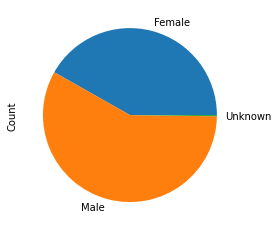

In [10]:
# how many are male / female drivers who were involved in accidents? 
crash_by_gender = crash.groupby('Gender')['Crash_ID'].count()
print(crash_by_gender)
crash_by_gender.plot.pie(ylabel = 'Count')

Crash_Month
1     1095
2      945
3      264
4      445
5      330
6      903
7     4491
8     7273
9     4560
10    4694
11    4058
12    3801
Name: Crash_ID, dtype: int64


<AxesSubplot:xlabel='Crash_Month'>

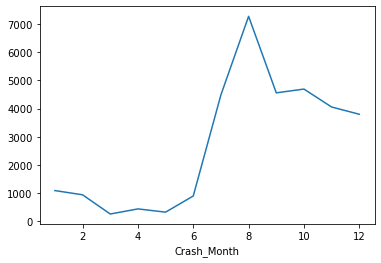

In [11]:
# what is the trend of number of accidents in different months?
crash_by_month = crash.groupby('Crash_Month')['Crash_ID'].count()
print(crash_by_month)
crash_by_month.plot.line()

In [12]:
# check the statistics summary of the numeric variable Age
crash['Age'].describe()

count    32859.000000
mean        37.061170
std         14.930789
min         16.000000
25%         25.000000
50%         34.000000
75%         46.000000
max        117.000000
Name: Age, dtype: float64

<AxesSubplot:>

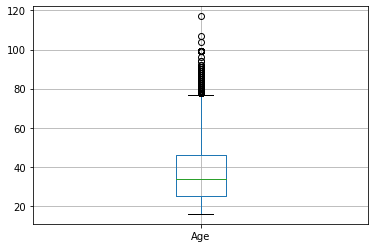

In [13]:
# get boxplot of Age
crash.boxplot('Age')

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

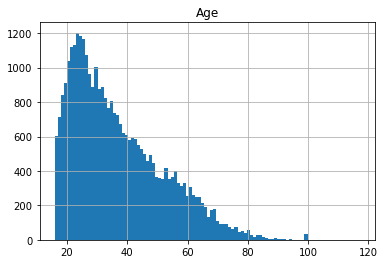

In [15]:
crash.hist('Age', bins = 100)

In [16]:
# remove outliers in Age above 80
crash_clean = crash.loc[crash['Age'] < 80]

array([[<AxesSubplot:title={'center':'Age'}>]], dtype=object)

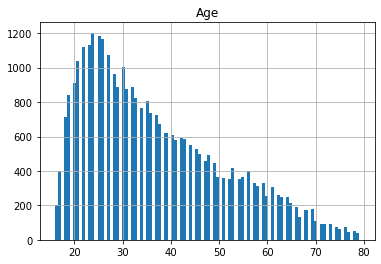

In [17]:
# check distribution again
crash_clean.hist('Age', bins = 100)

In [18]:
# still a little bit right skewed, let's take log
crash_clean['log_Age'] = np.log(crash_clean['Age'])

C:\Users\user\AppData\Local\Temp/ipykernel_880/3848697252.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crash_clean['log_Age'] = np.log(crash_clean['Age'])


count    32606.000000
mean         3.528658
std          0.382798
min          2.772589
25%          3.218876
50%          3.496508
75%          3.828641
max          4.369448
Name: log_Age, dtype: float64


array([[<AxesSubplot:title={'center':'log_Age'}>]], dtype=object)

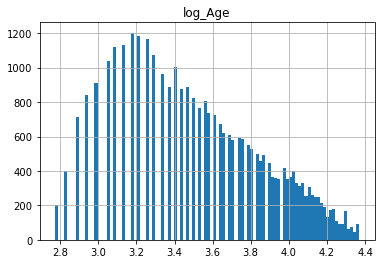

In [19]:
print(crash_clean['log_Age'].describe())
crash_clean.hist('log_Age', bins = 100)

## Assignment 1 (10 points):
### Please complete the following questions using this jupyter notebook, SAVE it as HTML and upload to canvas (File -> Download as -> HTML). This assignment will be due in two weeks. 

#### (1) (2 points) Import `load_summer.csv` and print out the first 5 rows of the data. Make sure the `load_summer.csv` is stored in your current working directory. 
#### (2) (2 points) Print out the summary statistics of the variable COAST. 
#### (3) (2 points) Plot a histogram of the variable COAST. Set bins = 100.
#### (4) (4 points) Plot the trend of the average COAST over hour. Hint: First apply `groupby()` function and `mean()` function to get average value of COAST over hour. Then apply `plot.line()`.